# Test Scores Toy Data

In [123]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
pd.options.display.max_rows = 20  # Shows 20 rows
pd.options.display.max_columns = None  # Shows All columns

## Loading the dataset

In [125]:
# These lines would load the data locally
# data_root = "./"
# filename = "Life_Expectancy_Data.csv"
# filepath = os.path.join(data_root, filename)
# df = pd.read_csv(filepath)

# We'll fetch it directly from the web
data_url = "https://aet-cs.github.io/white/ML/data/test-scores.csv"
df = pd.read_csv(data_url)
df

,student_id,minutes_studying,current_grade,num_pets,screen_time_minutes,final_exam_score
0,1,68.7,94.1,2,850,100.0
1,2,41.7,80.6,5,1054,81.1
2,3,72.5,83.0,3,1247,83.2
3,4,116.8,74.0,3,933,89.7
4,5,54.9,76.6,5,1127,64.0
...,...,...,...,...,...,...
95,96,54.6,82.6,5,798,73.4
96,97,59.9,77.9,1,793,71.0
97,98,71.6,81.2,1,1070,83.7
98,99,72.9,80.8,4,878,86.4


`describe` gives a quick overview of each feature

In [98]:
df.describe()

,student_id,minutes_studying,current_grade,num_pets,screen_time_minutes,final_exam_score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,63.018000,80.181000,2.750000,843.910000,78.663000
std,29.011492,17.109867,6.301222,1.578741,126.580521,11.456264
min,1.000000,26.800000,64.100000,0.000000,621.000000,49.600000
25%,25.750000,51.850000,76.375000,1.000000,759.750000,70.875000
50%,50.500000,59.750000,80.350000,3.000000,802.500000,79.900000
75%,75.250000,72.925000,84.725000,4.000000,894.250000,87.475000
max,100.000000,116.800000,95.100000,5.000000,1247.000000,100.000000


## Data Exploration

Show all the columns. Target is 'final_exam_score'

In [126]:
df.columns

Index(['student_id', 'minutes_studying', 'current_grade', 'num_pets',
       'screen_time_minutes', 'final_exam_score'],
      dtype='object')

Get the size of the dataframe. Shape returns (rows, cols)

In [127]:
target = "final_exam_score"

In [128]:
df.shape

(100, 6)

Let's get all the data types

In [129]:
df.dtypes

student_id               int64
minutes_studying       float64
current_grade          float64
num_pets                 int64
screen_time_minutes      int64
final_exam_score       float64
dtype: object

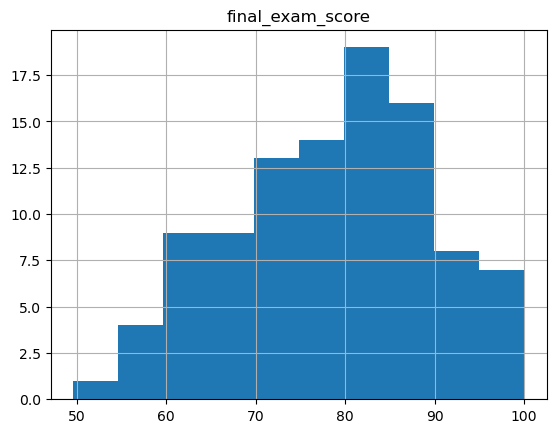

In [130]:
df.hist(target);

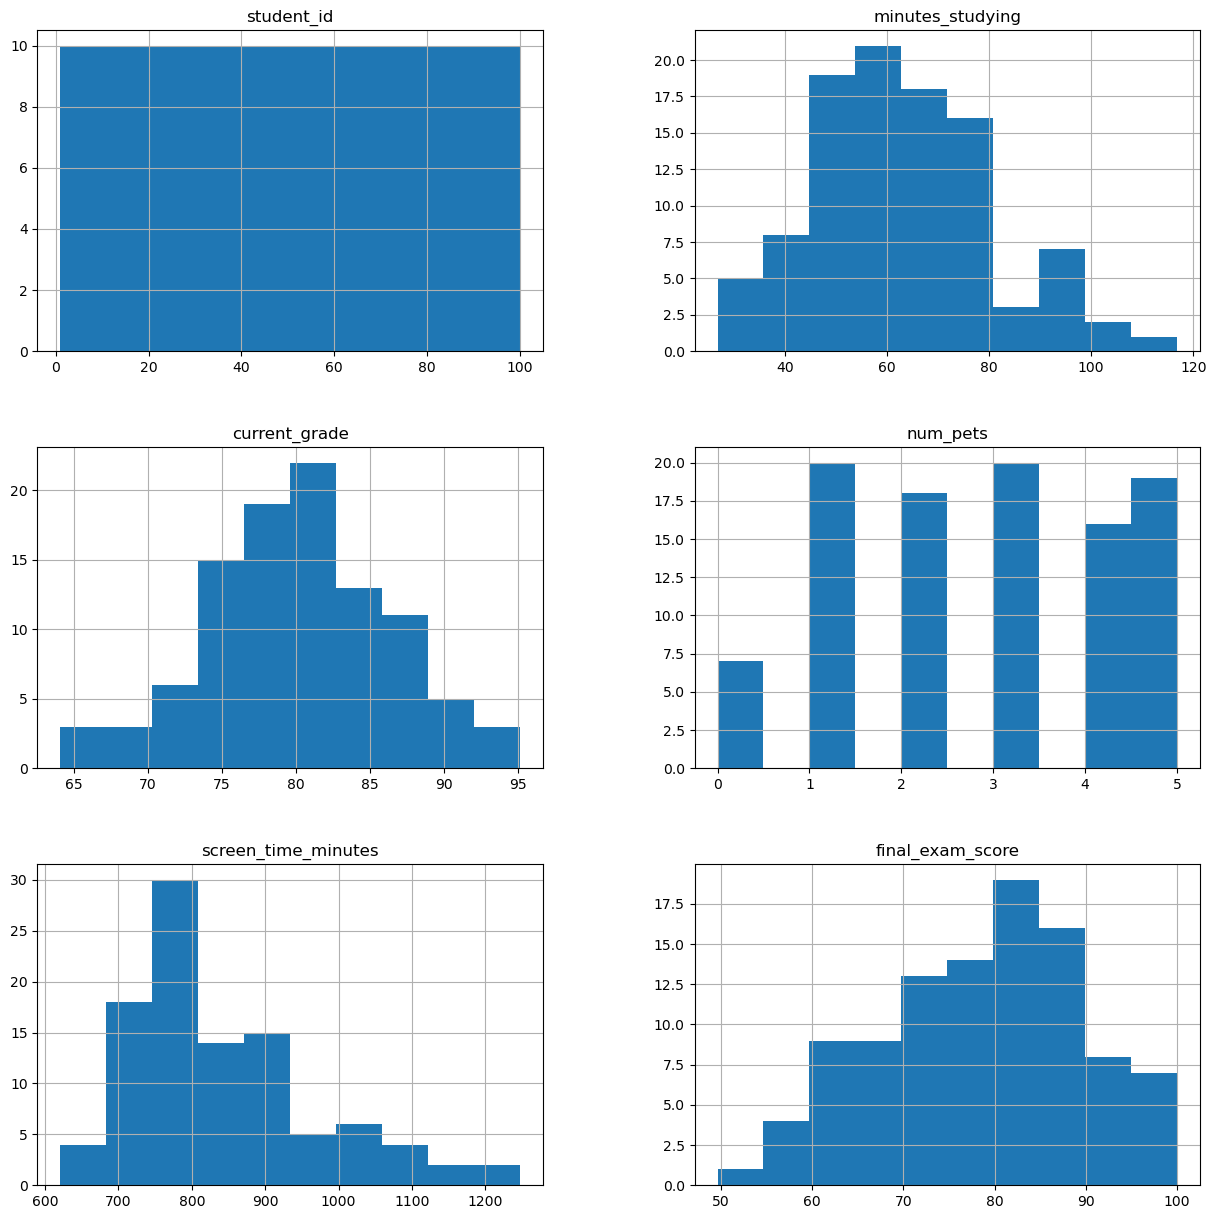

In [104]:
df.hist(figsize=(15,15));

### Individual Plots

In [131]:
df.columns

Index(['student_id', 'minutes_studying', 'current_grade', 'num_pets',
       'screen_time_minutes', 'final_exam_score'],
      dtype='object')

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

def plot_X_vs_Y(col1_name, col2_name, col1_label, col2_label):
        
    # Load the data
    df = pd.read_csv(data_url)
    
    # Extract variables
    X = df[[col1_name]].values  # needs to be 2D for sklearn
    y = df[col2_name].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Get statistics
    r2 = r2_score(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    print(f"Regression Statistics:")
    print(f"  Equation: y = {slope:.3f}x + {intercept:.3f}")
    print(f"  R² = {r2:.3f}")
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col1_name], df[col2_name], 
                alpha=0.6, s=50, label='Students')
    plt.plot(df[col1_name], y_pred, 
             color='red', linewidth=2, label='Regression Line')
    
    plt.xlabel(f'{col1_label}', fontsize=12)
    plt.ylabel(f'{col2_label}', fontsize=12)
    plt.title(f'{col1_label} vs {col2_label}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add equation to plot
    plt.text(0.05, 0.95, f'y = {slope:.3f}x + {intercept:.3f}\nR² = {r2:.3f}',
             transform=plt.gca().transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', 
             facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

Regression Statistics:
  Equation: y = 0.533x + 45.089
  R² = 0.633


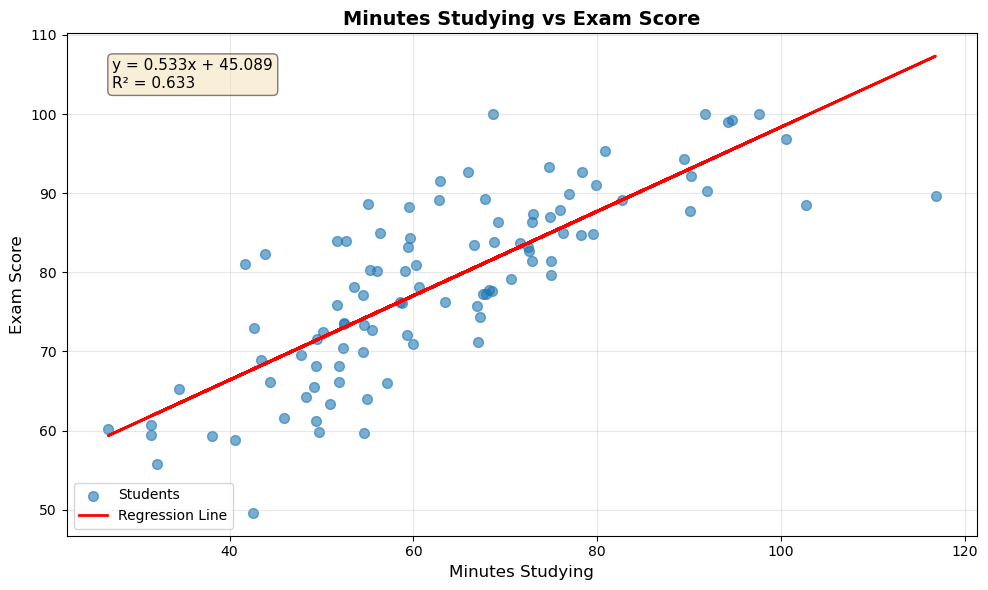

In [133]:
plot_X_vs_Y('minutes_studying','final_exam_score','Minutes Studying', 'Exam Score')

Regression Statistics:
  Equation: y = 0.956x + 76.034
  R² = 0.017


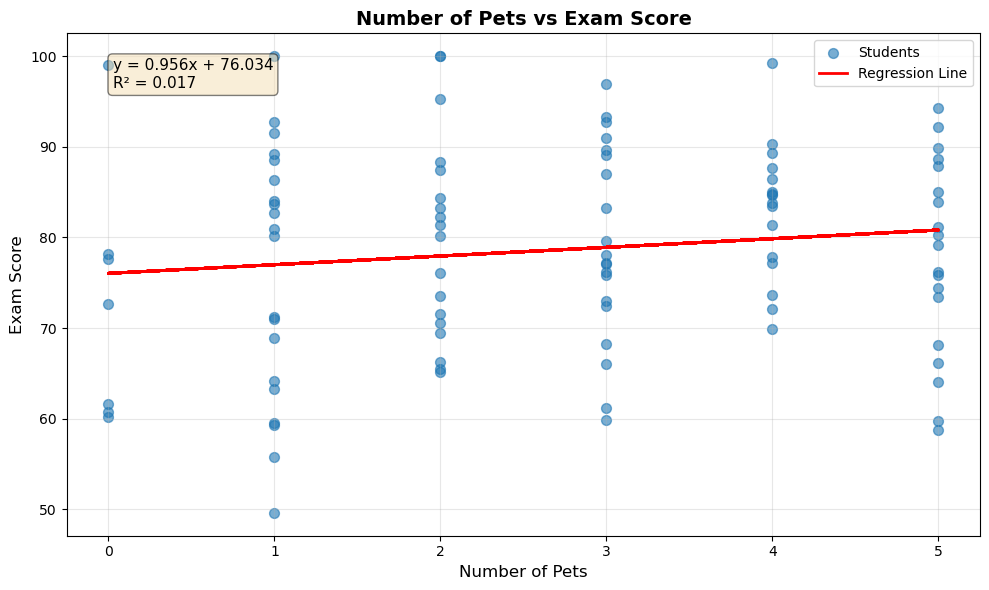

In [108]:
plot_X_vs_Y('num_pets','final_exam_score','Number of Pets', 'Exam Score')

Regression Statistics:
  Equation: y = -0.021x + 96.541
  R² = 0.055


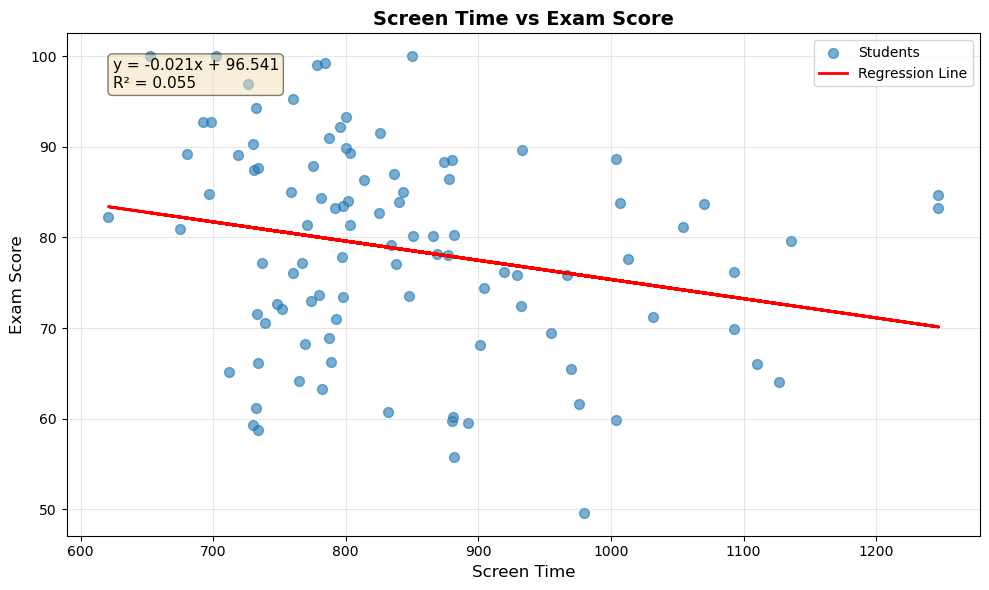

In [109]:
plot_X_vs_Y('screen_time_minutes','final_exam_score','Screen Time', 'Exam Score')

Regression Statistics:
  Equation: y = 0.050x + 77.044
  R² = 0.018


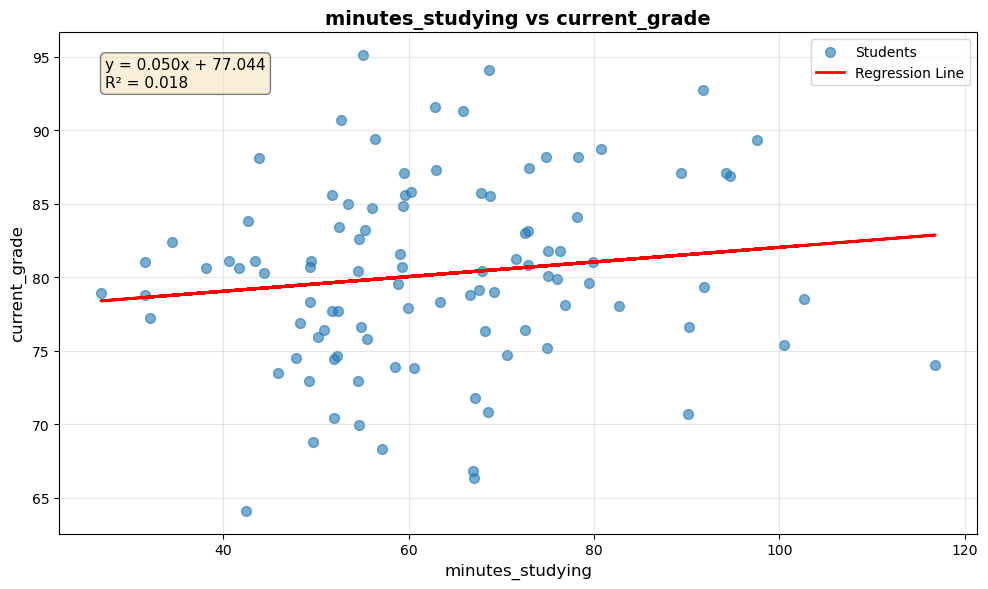

In [110]:
plot_X_vs_Y('minutes_studying','current_grade','minutes_studying','current_grade')

## Correlation matrix heat map

Let's get a quick visual representation of the relationshop between features in this dataset. First drop the non-predictive attributes. Use a **new name** so we don't pollute the original dataframe

In [111]:
df_heat = df.drop(["student_id"], axis = 1)

In [112]:
corr_matrix = df_heat.corr()

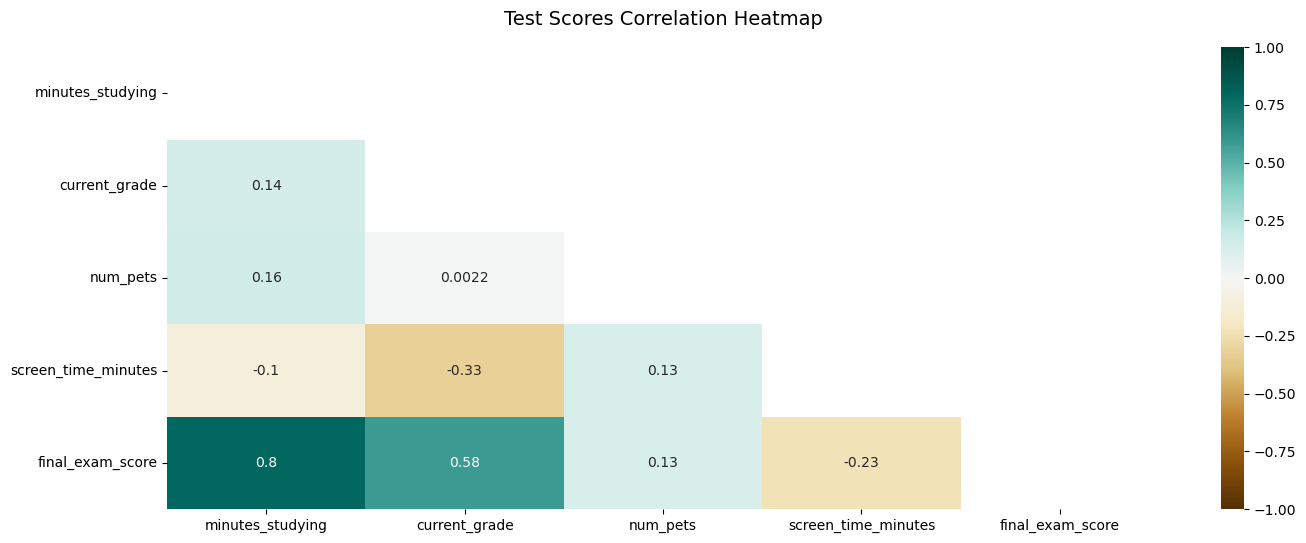

In [113]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Test Scores Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
plt.show()

Which features seem to be important?

In [114]:
row_filter = abs(corr_matrix[target])>0.1
top_features = pd.DataFrame(corr_matrix[target][row_filter])
top_features.sort_values(by=target)

,final_exam_score
screen_time_minutes,-0.234068
num_pets,0.131732
current_grade,0.584514
minutes_studying,0.795695
final_exam_score,1.000000


## Data Modeling

Here we will run a linear regression. First we need to clean up the data a bit. We will create a data pipeline so we can repeat this process as needed.

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

### Linear Regression

Three methods will load the data, preprocess it, and create X and y datasets for training and testing.

In [116]:
def get_data(filename):
    df = pd.read_csv(filename)
    return df    

In [117]:

def pre_process_data(df, one_hot_encode = False):
    target = "final_exam_score"    
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(include=object).columns

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])
    
    if one_hot_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])

        # df = pd.get_dummies(df, dtype=int)
        
    return df

In [118]:
def get_test_train(df, test_size = 0.2, random_state = 42):
    target = "final_exam_score"    
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [119]:
df = get_data(data_url)
X_train, X_test, y_train, y_test = get_test_train(df)

In [120]:
lreg = LinearRegression()
model = lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)
print(f"Train R-squared = {r2_score(lreg.predict(X_train), y_train):5.3}")
print(f"Test R-squared  = {r2_score(y_pred, y_test):5.3}")

Train R-squared =  0.86
Test R-squared  = 0.632


Text(0, 0.5, 'Predicted Exam Score')

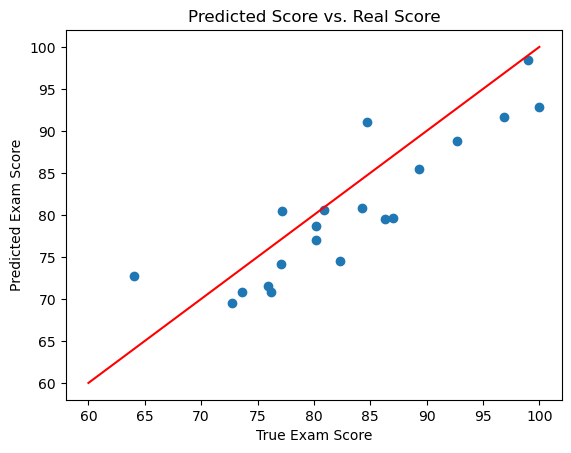

In [121]:
plt.scatter(y_test, y_pred);
plt.plot([60,100],[60,100],color='red')
plt.title("Predicted Score vs. Real Score")
plt.xlabel("True Exam Score")
plt.ylabel("Predicted Exam Score")

## Advanced Techniques

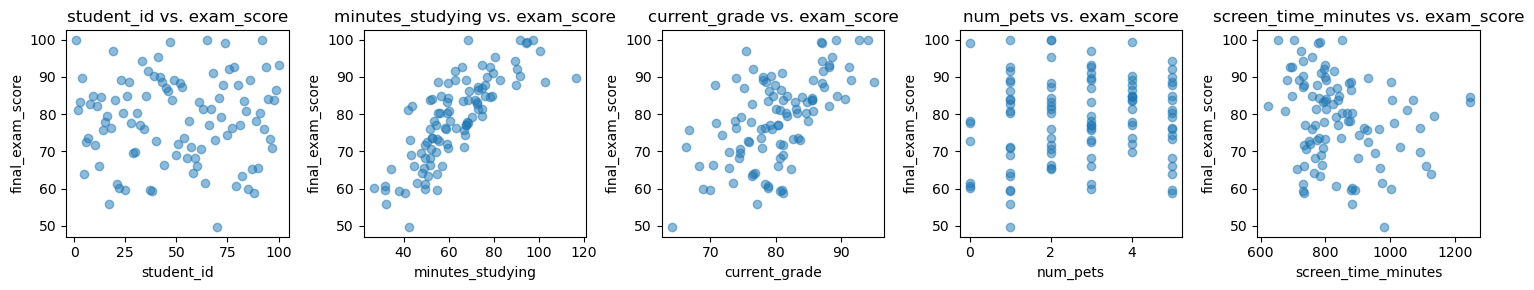

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

target = 'final_exam_score'
df = get_data(data_url)
features = df.drop(target, axis=1).select_dtypes(include=['number']).columns

# Set up a grid of subplots
num_features = len(features)
num_cols = 5  # Adjust this to your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Calculates rows needed

plt.figure(figsize=(15, num_rows * 3))

for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs. exam_score')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


## Importance Analysis

In [134]:
import statsmodels.api as sm
# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Get a summary of the regression
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       final_exam_score   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4871.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):                    1.06e-92
Time:                        14:27:41   Log-Likelihood:                         -231.06
No. Observations:                  80   AIC:                                      472.1
Df Residuals:                      75   BIC:                                      484.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [135]:
# Extract the summary table as a DataFrame
summary_table = model.summary2().tables[1]  # tables[1] is the coefficients table in summary2()

# Sort by p-values (for example)
sorted_summary = summary_table.sort_values(by='t')


# Set display options to prevent truncation
pd.options.display.max_rows = None  # Shows all rows
pd.options.display.max_columns = None  # Shows all columns

sorted_summary

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
screen_time_minutes,-0.005691,0.003260,-1.745824,8.493657e-02,-0.012184,0.000803
student_id,-0.012885,0.017905,-0.719632,4.739879e-01,-0.048553,0.022783
num_pets,0.238546,0.323246,0.737970,4.628356e-01,-0.405393,0.882484
current_grade,0.661738,0.044278,14.945103,3.437114e-24,0.573532,0.749945
minutes_studying,0.474627,0.029088,16.316898,2.189148e-26,0.416681,0.532573
